# Microsoft Exploratory Film Insights


* Student name: Joe Garcia
* Student pace: full time
* Scheduled project review date/time: 3/11/2022, 11am
* Instructor name: Praveen Gowtham


# OVERVIEW

Presenting to business partner, Microsoft, what would be the best practices to making a movie. They will learn how much budget to put in a movie, what kind of movie they should focus on, and what the general perception of a movie is had by the audience about the movie.

# Business Problem

- How does the overall budget impact the final movie result?
- How does the general public receive the movies?
- What are the major traits per movie that they should incoporate into their movies?

In [54]:
#Here I combined all the DataFrame necessities such as matplotlib and seaborn, also with numpy for statistics

import pandas as pd
import math
import matplotlib
import matplotlib.pyplot as plt 
from re import sub
from decimal import Decimal
import numpy as np
import seaborn as sns, operator as op
%matplotlib inline


#Here I unzipped the movie_basics.csv, and created a Pandas dataframe (df1)

movie_basics_df = pd.read_csv('zippedData/movie_basics_extracted.csv', index_col=False)
movie_basics_df.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


# Investigating movie genres

In [55]:
#Here I found out that the start year goes beyond, 2022 so I have to git rid of those.
movie_basics_df['start_year'].sort_values().tail()

2948     2024
52213    2025
2949     2026
96592    2027
89506    2115
Name: start_year, dtype: int64

In [56]:
#Limiting on the years that would be found
movie_basics_df= movie_basics_df[(movie_basics_df['start_year'] >= 2010) & (movie_basics_df['start_year'] <= 2022)]
movie_basics_df.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [57]:
#Dropping all the NaN values (.dropna()) 
genres_list = list(movie_basics_df['genres'].dropna())

#Making a blank unique_genre_names list in order to be used in the for loop
unique_genre_names = []


#Here I split every element in a row within genres_list, to find which names where by themselves

for i in genres_list:
    new_num = len(i.split(","))
    if new_num == 1 : #Just obtain the split  genres_list with one list  inside
        unique_genre_names.append(i)
    else:
        None

#Here is the list with one genre name  inside
unique_genre_names[:5]

['Drama', 'Comedy', 'Biography', 'Drama', 'History']

In [58]:
#Made a dictionary with the genres names equal to 0
unique_genre_names_dic={}
for word in unique_genre_names: # think: word = 'Documentary'
    unique_genre_names_dic.update({word : 0})   
unique_genre_names_dic

{'Drama': 0,
 'Comedy': 0,
 'Biography': 0,
 'History': 0,
 'Documentary': 0,
 'Sci-Fi': 0,
 'Thriller': 0,
 'Horror': 0,
 'Action': 0,
 'Adventure': 0,
 'Fantasy': 0,
 'Musical': 0,
 'Western': 0,
 'Romance': 0,
 'Mystery': 0,
 'Crime': 0,
 'Animation': 0,
 'Family': 0,
 'Sport': 0,
 'Music': 0,
 'News': 0,
 'Talk-Show': 0,
 'Reality-TV': 0,
 'War': 0,
 'Game-Show': 0}

In [59]:
#Here I made a for loop that obtained all the Dictionary keys (Drama, Comedy, ect) and ran them with  all the words
#From the genres_list and added +1 for every word

for string_name in genres_list:
    string_list = string_name.split(',') # string_list = ['Action', 'Crime', 'Drama'] for example
    for word in string_list: # think: word = 'Action', then word = 'Crime', then word='Drama'
        if word in unique_genre_names:  #if word is in the unique names dictionary, add 1 to the dictionary
            unique_genre_names_dic[word] = unique_genre_names_dic[word]+1

In [60]:
#Here I sorted the dictionary of genres by the number of movies (values)
sorted_genre_dict = dict(sorted(unique_genre_names_dic.items(),key=lambda x:x[1],reverse = True))


In [61]:
#Here I sorted the genre_dict values into a list 
genre_values_sorted_list = list(sorted_genre_dict.values())
top_genre_values_sorted = genre_values_sorted_list[:15]

In [62]:
#Here I sorted the genre_dict names 
genre_names_sorted_list = list(sorted_genre_dict.keys())
top_genre_names_sorted = genre_names_sorted_list[:15]

# Result 1 - Movie Genres

The graph shows us what is the key genre element per film, if they have some sort of element, then its marked down. Here we have discovered that most movies have an element of Documentary and Drama. We have discovered that Documentary, Drama, and Comedy are the top elements that compose all the movies.






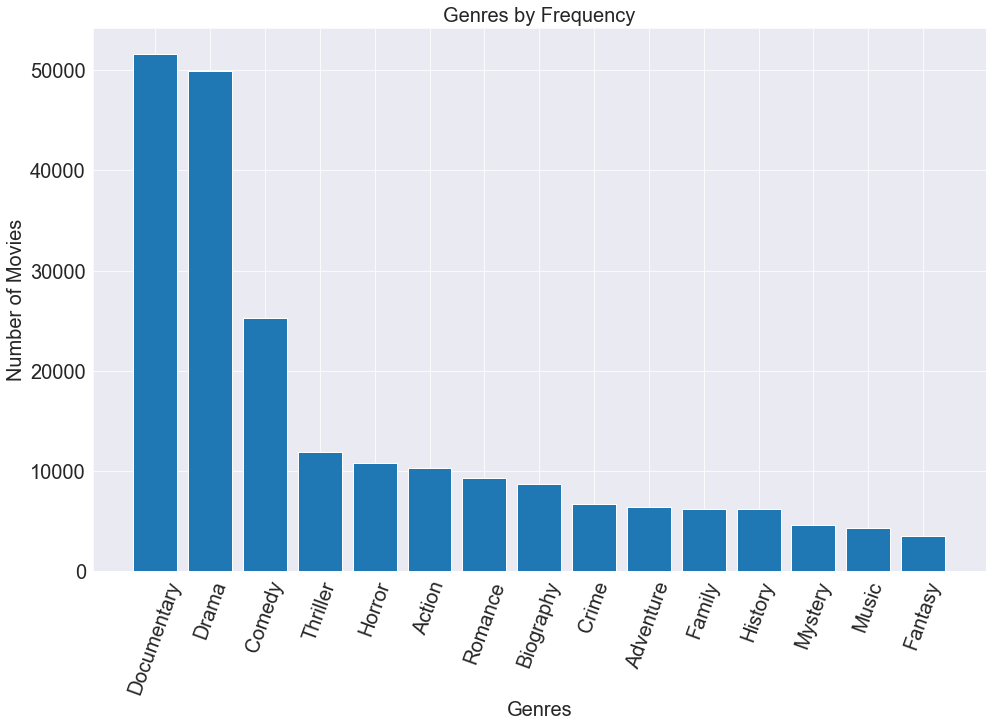

In [63]:
bar_chart_title = 'Genres by Frequency' 
bar_chart_count_label = 'Number of Movies'
bar_chart_series_label = 'Genres'


sns.set_style("darkgrid")

player_count_figure1, ax1 = plt.subplots(figsize=(16, 10))

ax1.bar(x = top_genre_names_sorted, height = top_genre_values_sorted ) 

ax1.set_title(bar_chart_title, fontsize = 20) 
ax1.set_xlabel(bar_chart_series_label, fontsize=20) 
ax1.set_ylabel(bar_chart_count_label, fontsize = 20)


plt.xticks(rotation=70,fontsize = 20);
plt.yticks(fontsize = 20);

# Investigating Returns on Investment (ROI)

In [64]:
#Here I managed to obtain the movie_budgets dataframe and made it into

movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv')
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [65]:
# changes money string to a simple def to change the money into a string
def change_money_to_float(money_string):
    float_value= float(Decimal(sub(r'[^\d.]', '', money_string)) )
    return float_value

In [66]:
#Getting the domestic_gross as a floating point rather than a string with the $, and creating a new dataframe column

domestic_gross_list =list(movie_budgets_df['domestic_gross'][0:])

domestic_gross_df4 = [ change_money_to_float(t) for t in domestic_gross_list] 

# Dropping old domestic_gross column and putting the new one in that has floats

columns_to_overwrite1 = ['domestic_gross']

movie_budgets_df.drop(labels=columns_to_overwrite1, axis="columns", inplace=True)

movie_budgets_df['domestic_gross'] = domestic_gross_df4

In [67]:
 #Here I got the worldwide list, even though I did not end up using it

worldwide_list =list(movie_budgets_df['worldwide_gross'][0:])

worldwide_gross_df4 = [ change_money_to_float(t) for t in worldwide_list]

# Doing the same to worldwide_gross

columns_to_overwrite2 = ['worldwide_gross']

movie_budgets_df.drop(labels=columns_to_overwrite2, axis="columns", inplace=True)

movie_budgets_df['worldwide_gross'] = worldwide_gross_df4

In [68]:
#Here I managed to create a new column with the movie_budgets_df

production_budget_list =list(movie_budgets_df['production_budget'][0:])

production_budget_df4 = [ change_money_to_float(t) for t in production_budget_list]

# Doing the same to production_budget

columns_to_overwrite3 = ['production_budget']

movie_budgets_df.drop(labels=columns_to_overwrite3, axis="columns", inplace=True)

movie_budgets_df['production_budget'] = production_budget_df4

In [69]:
#Here I just checked that the worldwide gross was a list, even though I did not end up using it
worldwide_prod_list = list(movie_budgets_df['worldwide_gross']/movie_budgets_df['production_budget'])
len(worldwide_prod_list)

5782

In [70]:
worldwide_prod_rounded = [round(worldwide_prod_list[x] , 4) for x in list(range(0,len(worldwide_prod_list)))]

sorted(worldwide_prod_rounded, reverse = True)

[1800.0,
 498.75,
 431.5179,
 416.5647,
 413.8333,
 342.0586,
 312.3543,
 291.704,
 263.9216,
 225.0,
 215.3846,
 208.5301,
 189.8031,
 180.1802,
 164.5827,
 155.4909,
 144.2311,
 125.0,
 124.2779,
 122.5,
 120.2751,
 115.3464,
 115.3068,
 111.0373,
 108.6447,
 102.4316,
 101.7595,
 101.3333,
 100.1347,
 100.0,
 95.576,
 90.8936,
 89.7959,
 89.5863,
 86.5667,
 78.4,
 75.5205,
 74.978,
 74.6427,
 71.5089,
 70.1459,
 68.8017,
 67.378,
 66.9466,
 66.5806,
 64.585,
 64.3642,
 63.1191,
 61.2158,
 60.6204,
 59.7015,
 59.567,
 59.1707,
 57.5085,
 55.793,
 55.4583,
 53.9768,
 53.3699,
 53.3659,
 52.2862,
 51.0736,
 47.9026,
 47.2,
 46.707,
 45.9615,
 44.8957,
 43.497,
 42.4117,
 41.6333,
 41.408,
 40.7857,
 40.5985,
 40.0825,
 40.0,
 39.5174,
 39.45,
 39.225,
 39.1989,
 38.9811,
 38.3571,
 37.6,
 37.2959,
 36.8582,
 36.8243,
 36.6667,
 36.5439,
 36.1702,
 35.8763,
 35.6845,
 35.6322,
 34.9042,
 34.4835,
 34.0,
 33.3333,
 33.0929,
 33.0643,
 32.3843,
 31.779,
 31.0163,
 30.9033,
 30.8214,
 30.6

In [71]:
#Here I did not end up using the ROI for worldwide 
movie_budgets_df['ROI for WorldWide'] = worldwide_prod_rounded

In [72]:
#so trying to display worldwide_ROI 

movie_budgets_df.sort_values( by= "ROI for WorldWide", ascending = False).head()

,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide
5745,46,"Jun 30, 1972",Deep Throat,45000000.0,45000000.0,25000.0,1800.0000
5613,14,"Mar 21, 1980",Mad Max,8750000.0,99750000.0,200000.0,498.7500
5492,93,"Sep 25, 2009",Paranormal Activity,107918810.0,194183034.0,450000.0,431.5179
5679,80,"Jul 10, 2015",The Gallows,22764410.0,41656474.0,100000.0,416.5647
5406,7,"Jul 14, 1999",The Blair Witch Project,140539099.0,248300000.0,600000.0,413.8333


In [73]:
#Here is the domesticgross ROI that I managed to get, and saw how many rows the final product was

dom_prod_list = list(movie_budgets_df['domestic_gross']/movie_budgets_df['production_budget'])
len(dom_prod_list)

5782

In [74]:
#Here I ended up rounding the domestic_product_list because it gave me a large decimal

dom_prod_list_rounded = [round(dom_prod_list[x] , 4) for x in list(range(0,len(dom_prod_list)))]

sorted_rounded_list = sorted(dom_prod_list_rounded[0:10], reverse = True)
sorted_rounded_list

[3.061, 2.2627, 1.9564, 1.7894, 1.3884, 1.0314, 0.7634, 0.6669, 0.5871, 0.1222]

In [75]:
#I named the column for ROI for Domestic and gave it the dom_prod_list_rounded 
movie_budgets_df['ROI for Domestic'] = dom_prod_list_rounded

In [76]:
# look at df4 again
movie_budgets_df.head()


,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide,ROI for Domestic
0,1,"Dec 18, 2009",Avatar,760507625.0,2.776345e+09,425000000.0,6.5326,1.7894
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,241063875.0,1.045664e+09,410600000.0,2.5467,0.5871
2,3,"Jun 7, 2019",Dark Phoenix,42762350.0,1.497624e+08,350000000.0,0.4279,0.1222
3,4,"May 1, 2015",Avengers: Age of Ultron,459005868.0,1.403014e+09,330600000.0,4.2438,1.3884
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,620181382.0,1.316722e+09,317000000.0,4.1537,1.9564


In [77]:
# filtering out the ones where ROI for domestic column is 0
movie_budgets_df = movie_budgets_df[movie_budgets_df['ROI for Domestic'] != 0.0]

In [78]:
# look at df4 now

#df4.sort_values(by='ROI for Domestic').head(50)
movie_budgets_df.sort_values(by='ROI for Domestic').head()

,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide,ROI for Domestic
2003,4,"Feb 21, 2008",Genghis Khan: To the Ends of the Earth and Sea,3892.0,4874498.0,30000000.0,0.1625,0.0001
2004,5,"Jan 30, 2015",Wild Card,3200.0,4315789.0,30000000.0,0.1439,0.0001
4081,82,"May 21, 2010",Perrierâs Bounty,828.0,828.0,6600000.0,0.0001,0.0001
3818,19,"May 8, 2015",Skin Trade,1242.0,1242.0,9000000.0,0.0001,0.0001
1767,68,"Sep 5, 2014",Thunder and the House of Magic,4091.0,62582520.0,34000000.0,1.8407,0.0001


In [79]:
# filter out the movies where the ROI for domestic is too little (0.1) or too large (>1000)

df4_ROIcropped = movie_budgets_df[ (movie_budgets_df['ROI for Domestic'] >=0.1) & (movie_budgets_df['ROI for Domestic'] < 50.0)]

In [80]:
#The ROI cropped with the production budget 

df4_productioncropped = df4_ROIcropped [ df4_ROIcropped ['production_budget'] < 2e8]

In [81]:
#Here I was able to find the median of the movie budgets list
median_movie_budget = np.median(list(movie_budgets_df['production_budget']))
median_movie_budget

20000000.0

# Result 2 - Return on Investment

Here is my second graph, getting the ROI (Return On Investment) compared to the budget

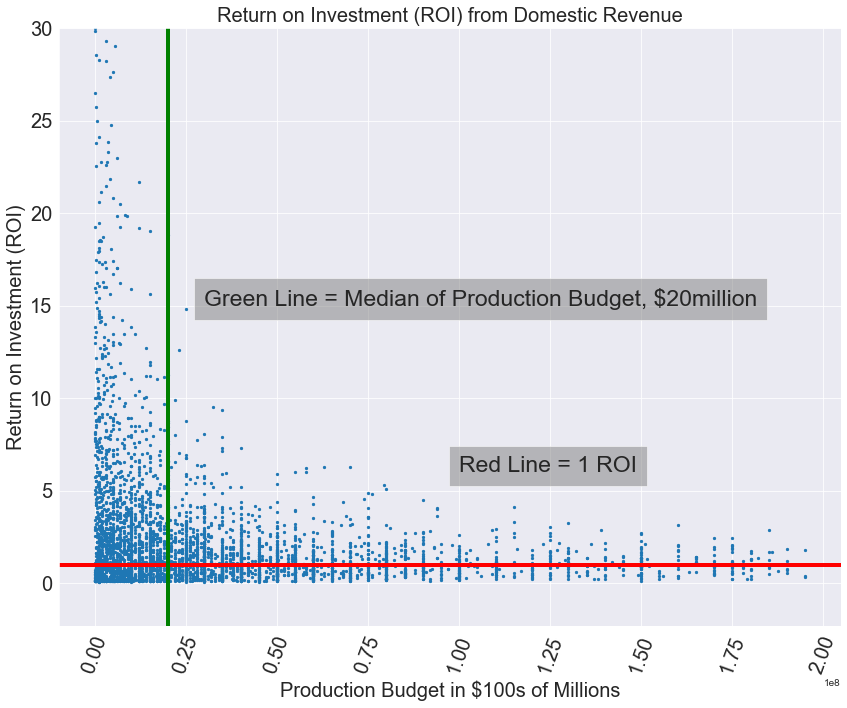

In [82]:
player_count_figure3, ax = plt.subplots(figsize=(14, 11))

plt.scatter(df4_productioncropped['production_budget'] , df4_productioncropped['ROI for Domestic'], s = 5)
plt.xlabel('Production Budget in $100s of Millions',fontsize = 20)
plt.ylabel('Return on Investment (ROI)', fontsize = 20)
plt.title('Return on Investment (ROI) from Domestic Revenue',fontsize = 20 )
plt.text(1e8 ,6, "Red Line = 1 ROI", fontsize = 23, bbox = {'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})

plt.text(0.3e8 ,15, "Green Line = Median of Production Budget, $20million", fontsize = 23, bbox = {'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})


plt.ylim( top = 30)
plt.xticks(rotation=70,fontsize = 20);
plt.yticks(fontsize = 20);


plt.axhline(y=1, color='r', linestyle='-', linewidth=4)

plt.axvline(x=median_movie_budget, color='g', linestyle='-', linewidth=4)

plt.show()

In [30]:
#Here I was just sorting the values of production budget
movie_budgets_df.sort_values(by='production_budget').head()

,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide,ROI for Domestic
5781,82,"Aug 5, 2005",My Date With Drew,181041.0,181041.0,1100.0,164.5827,164.5827
5779,80,"Jul 13, 2005",Return to the Land of Wonders,1338.0,1338.0,5000.0,0.2676,0.2676
5778,79,"Apr 2, 1999",Following,48482.0,240495.0,6000.0,40.0825,8.0803
5773,74,"Feb 26, 1993",El Mariachi,2040920.0,2041928.0,7000.0,291.7040,291.5600
5776,77,"Dec 31, 2004",The Mongol King,900.0,900.0,7000.0,0.1286,0.1286


In [31]:
#checking to see if movie_budgets has an NaN
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5232 entries, 0 to 5781
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5232 non-null   int64  
 1   release_date       5232 non-null   object 
 2   movie              5232 non-null   object 
 3   domestic_gross     5232 non-null   float64
 4   worldwide_gross    5232 non-null   float64
 5   production_budget  5232 non-null   float64
 6   ROI for WorldWide  5232 non-null   float64
 7   ROI for Domestic   5232 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 367.9+ KB


In [32]:
# the losers made less than 1x their money back

losers_df = movie_budgets_df[ (movie_budgets_df['ROI for Domestic'] < 1.0)]
losers_df

,id,release_date,movie,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide,ROI for Domestic
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,241063875.0,1.045664e+09,410600000.0,2.5467,0.5871
2,3,"Jun 7, 2019",Dark Phoenix,42762350.0,1.497624e+08,350000000.0,0.4279,0.1222
8,9,"Nov 17, 2017",Justice League,229024295.0,6.559452e+08,300000000.0,2.1865,0.7634
9,10,"Nov 6, 2015",Spectre,200074175.0,8.796209e+08,300000000.0,2.9321,0.6669
11,12,"May 25, 2018",Solo: A Star Wars Story,213767512.0,3.931513e+08,275000000.0,1.4296,0.7773
...,...,...,...,...,...,...,...,...
5769,70,"Apr 1, 1996",Bang,527.0,5.270000e+02,10000.0,0.0527,0.0527
5770,71,"Aug 14, 2008",The Rise and Fall of Miss Thang,401.0,4.010000e+02,10000.0,0.0401,0.0401
5772,73,"Jan 13, 2012",Newlyweds,4584.0,4.584000e+03,9000.0,0.5093,0.5093
5776,77,"Dec 31, 2004",The Mongol King,900.0,9.000000e+02,7000.0,0.1286,0.1286


# Investigating Ratings

In [33]:
#Here I unzipped the the movie_ratings.csv and created a Pandas dataframe (df2)
movie_ratings = pd.read_csv('zippedData/movie_ratings_extracted.csv')
movie_ratings.head()

,Unnamed: 0,movie_id,averagerating,numvotes
0,0,tt10356526,8.3,31
1,1,tt10384606,8.9,559
2,2,tt1042974,6.4,20
3,3,tt1043726,4.2,50352
4,4,tt1060240,6.5,21


In [34]:
#Here I unzipped the movie_basics.csv, and created a Pandas dataframe (df1)

movie_basics = pd.read_csv('zippedData/movie_basics_extracted.csv', index_col=False)
movie_basics.head()

,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [35]:
#Merged_df by movie ratings and movie basics on the same 'movie_id', giving me a more complete list
merged_df = pd.merge(movie_basics, movie_ratings, on='movie_id', how='outer')
merged_df.head()


,Unnamed: 0_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0_y,averagerating,numvotes
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",36049.0,7.0,77.0
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",725.0,7.2,43.0
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,18429.0,6.9,4517.0
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",2223.0,6.1,13.0
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",1143.0,6.5,119.0


In [36]:
#seeing if I merged successfully 
merged_sorted = merged_df.sort_values(by = 'movie_id')

In [37]:
merged_sorted.head()

,Unnamed: 0_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0_y,averagerating,numvotes
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",36049.0,7.0,77.0
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",725.0,7.2,43.0
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,18429.0,6.9,4517.0
3,3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",2223.0,6.1,13.0
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",1143.0,6.5,119.0


In [38]:
#seeing that I have no duplicated sum
merged_sorted['movie_id'].duplicated().sum()

0

In [39]:
#seeing how large it is
merged_sorted.shape

(146144, 10)

In [40]:
#Dropped the NaNs for the averagerating in the merged_sorted DataFrame
merged_sorted['averagerating'].dropna()

0         7.0
1         7.2
2         6.9
3         6.1
4         6.5
         ... 
146115    6.2
146122    8.7
146125    8.5
146129    6.6
146134    6.5
Name: averagerating, Length: 73856, dtype: float64

In [41]:
#Dropped the NaNs in the merged_sorted DataFrame
merged_sorted_cleaned = merged_sorted.dropna()
merged_sorted_cleaned.head()

,Unnamed: 0_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0_y,averagerating,numvotes
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",36049.0,7.0,77.0
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",725.0,7.2,43.0
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,18429.0,6.9,4517.0
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",1143.0,6.5,119.0
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",30166.0,8.1,263.0


In [42]:
#seeing how large the merged sorted CLEANED version is
len(merged_sorted_cleaned)

65720

In [43]:
#Changed the names of the budgest df from movie to primary_title so I could merge them together
movie_budgets_df.rename(columns={'movie':'primary_title'}, inplace=True)

In [44]:
#merged together the movie_budgets_df and the merged_sorted_cleaned by the primary_title
merged_titles_df = pd.merge(movie_budgets_df, merged_sorted_cleaned, on='primary_title', how='outer')
merged_titles_df.head()

,id,release_date,primary_title,domestic_gross,worldwide_gross,production_budget,ROI for WorldWide,ROI for Domestic,Unnamed: 0_x,movie_id,original_title,start_year,runtime_minutes,genres,Unnamed: 0_y,averagerating,numvotes
0,1.0,"Dec 18, 2009",Avatar,760507625.0,2.776345e+09,425000000.0,6.5326,1.7894,17060.0,tt1775309,Abatâ,2011.0,93.0,Horror,1762.0,6.1,43.0
1,2.0,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,241063875.0,1.045664e+09,410600000.0,2.5467,0.5871,6448.0,tt1298650,Pirates of the Caribbean: On Stranger Tides,2011.0,136.0,"Action,Adventure,Fantasy",1499.0,6.6,447624.0
2,3.0,"Jun 7, 2019",Dark Phoenix,42762350.0,1.497624e+08,350000000.0,0.4279,0.1222,112147.0,tt6565702,Dark Phoenix,2019.0,113.0,"Action,Adventure,Sci-Fi",5546.0,6.0,24451.0
3,4.0,"May 1, 2015",Avengers: Age of Ultron,459005868.0,1.403014e+09,330600000.0,4.2438,1.3884,39010.0,tt2395427,Avengers: Age of Ultron,2015.0,141.0,"Action,Adventure,Sci-Fi",66768.0,7.3,665594.0
4,5.0,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,620181382.0,1.316722e+09,317000000.0,4.1537,1.9564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [45]:
#Dropped the NaNs for the genres in the merger_titles_df
merged_titles_df.dropna(subset=['genres'], inplace = True)


In [46]:
#Dropped the NaN for ROI for Domestic in the merged_titles_df
merged_titles_df.dropna(subset=['ROI for Domestic'], inplace = True)


In [47]:
#Dropped the NaNs from the merged_sorted_cleaned dataframe column, and made it into a list

genres_list = list(merged_sorted_cleaned['genres'].dropna())
genres_list

['Action,Crime,Drama',
 'Biography,Drama',
 'Drama',
 'Comedy,Drama,Fantasy',
 'Adventure,Animation,Comedy',
 'Drama',
 'History',
 'Documentary',
 'Drama',
 'Documentary',
 'Animation,Drama,History',
 'Drama',
 'Drama',
 'Drama,Mystery',
 'Action,Animation,Comedy',
 'Biography,Comedy,Drama',
 'Documentary',
 'Action,Drama',
 'Documentary,History',
 'Sci-Fi',
 'Comedy',
 'Thriller',
 'Adventure,Animation,Sci-Fi',
 'Action,Crime,Drama',
 'Drama,Horror',
 'Drama,Mystery,Thriller',
 'Drama,Family',
 'Adventure,Comedy,Romance',
 'Comedy,Drama',
 'Adventure,Animation,Comedy',
 'Adventure,Drama,Romance',
 'Biography',
 'Horror',
 'Comedy,Drama',
 'Adventure,Comedy,Drama',
 'Drama,Sci-Fi,Thriller',
 'Action',
 'Comedy,Drama,Romance',
 'Action,Crime,Drama',
 'Action,Adventure,Sci-Fi',
 'Action,Crime,Drama',
 'Comedy,Drama',
 'Crime,Drama',
 'Adventure,Animation,Comedy',
 'Drama',
 'Comedy,Family',
 'Comedy,Drama,Romance',
 'Drama',
 'Adventure,Animation,Comedy',
 'Adventure',
 'Action,Adventur

In [48]:
#getting all the unique genre that have 1 in them
unique_genre_names = []

for i in genres_list:
    new_num = len(i.split(","))
    if new_num == 1 :
        unique_genre_names.append(i)
    else:
        None
unique_genre_names

['Drama',
 'Drama',
 'History',
 'Documentary',
 'Drama',
 'Documentary',
 'Drama',
 'Drama',
 'Documentary',
 'Sci-Fi',
 'Comedy',
 'Thriller',
 'Biography',
 'Horror',
 'Action',
 'Drama',
 'Drama',
 'Adventure',
 'Drama',
 'Fantasy',
 'Documentary',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Documentary',
 'Comedy',
 'Documentary',
 'Action',
 'Documentary',
 'Drama',
 'Drama',
 'Horror',
 'Horror',
 'Comedy',
 'Drama',
 'Drama',
 'Documentary',
 'Drama',
 'Drama',
 'Drama',
 'Documentary',
 'Drama',
 'Horror',
 'Drama',
 'Drama',
 'Drama',
 'Comedy',
 'Drama',
 'Drama',
 'Drama',
 'Thriller',
 'Thriller',
 'Comedy',
 'Drama',
 'Documentary',
 'Action',
 'Documentary',
 'Comedy',
 'Comedy',
 'Adventure',
 'Drama',
 'Documentary',
 'Drama',
 'Thriller',
 'Drama',
 'Documentary',
 'Drama',
 'Documentary',
 'Comedy',
 'Drama',
 'Documentary',
 'Action',
 'Sci-Fi',
 'Romance',
 'Comedy',
 'Documentary',
 'Drama',
 'Comedy',
 'Mystery',
 'Drama',
 'Documentary',
 'Thriller',
 'Documentar

In [198]:
#getting all the unique_genre_names using set
unique_genre_names = set(unique_genre_names)
unique_genre_names

{'Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Game-Show',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'News',
 'Reality-TV',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western'}

In [199]:
unique_genre_names_dic={}
for word in unique_genre_names: # think: word = 'Documentary'
    unique_genre_names_dic.update({word : [] })   
unique_genre_names_dic

{'Thriller': [],
 'Adventure': [],
 'Music': [],
 'Horror': [],
 'Western': [],
 'Drama': [],
 'Comedy': [],
 'Crime': [],
 'Musical': [],
 'Family': [],
 'History': [],
 'Animation': [],
 'Documentary': [],
 'Action': [],
 'Game-Show': [],
 'Romance': [],
 'War': [],
 'Mystery': [],
 'Biography': [],
 'Fantasy': [],
 'Sport': [],
 'News': [],
 'Sci-Fi': [],
 'Reality-TV': []}

In [200]:
#Just checking to see if my merged_sorted_cleaned was ok
merged_sorted_cleaned.head()

,Unnamed: 0_x,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,Unnamed: 0_y,averagerating,numvotes
0,0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",36049.0,7.0,77.0
1,1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",725.0,7.2,43.0
2,2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,18429.0,6.9,4517.0
4,4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",1143.0,6.5,119.0
7,7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",30166.0,8.1,263.0


In [201]:
#Got the averagerating as a list
averagerating_list = list(merged_sorted_cleaned['averagerating'])
averagerating_list[0]

7.0

In [202]:
#got the average rating as a list 
for i in range(0, len(genres_list)):
    string_name = genres_list[i]
    string_list = string_name.split(',') # string_list = ['Action', 'Crime', 'Drama'] for example
    
    for word in string_list:# think: word = 'Action', then word = 'Crime', then word='Drama'
        if word in unique_genre_names:
            unique_genre_names_dic[word].append(averagerating_list[i])

In [203]:
#here I got the un ique_genre_names_dic_ROI empty dictionary list for the ROI 
unique_genre_names_dic_ROI={}
for word in unique_genre_names: # think: word = 'Documentary'
    unique_genre_names_dic_ROI.update({word : [] })   
unique_genre_names_dic_ROI

{'Thriller': [],
 'Adventure': [],
 'Music': [],
 'Horror': [],
 'Western': [],
 'Drama': [],
 'Comedy': [],
 'Crime': [],
 'Musical': [],
 'Family': [],
 'History': [],
 'Animation': [],
 'Documentary': [],
 'Action': [],
 'Game-Show': [],
 'Romance': [],
 'War': [],
 'Mystery': [],
 'Biography': [],
 'Fantasy': [],
 'Sport': [],
 'News': [],
 'Sci-Fi': [],
 'Reality-TV': []}

In [204]:
#here I merged_titles of genres and made it into a list
merged_titles_genres_list = list(merged_titles_df['genres'])

In [205]:
#Here I made the merged_titles of the ROI domestic into a list
merged_titles_ROI_list = list(merged_titles_df['ROI for Domestic'])

In [206]:
#Here I managed to append the merged_titles_ROI_list onto the unique_genre_names_dic_ROI using a for loop
for i in range(0, len(merged_titles_genres_list)):
    string_name = merged_titles_genres_list[i]
    string_list = string_name.split(',') # string_list = ['Action', 'Crime', 'Drama'] for example
    
    for word in string_list:# think: word = 'Action', then word = 'Crime', then word='Drama'
        if word in unique_genre_names:
            unique_genre_names_dic_ROI[word].append(merged_titles_ROI_list[i])

In [207]:
#Got rid of the key and values that did not equal anything or equaled 0
unique_genre_names_dic_ROI = {key:val for key, val in unique_genre_names_dic_ROI.items() if key != 'Talk-Show'}
unique_genre_names_dic_ROI = {key:val for key, val in unique_genre_names_dic_ROI.items() if key != 'Reality-TV'}
unique_genre_names_dic_ROI = {key:val for key, val in unique_genre_names_dic_ROI.items() if key != 'Game-Show'}

In [208]:
#list of unique_genre_names_dic_ROI keys
list(unique_genre_names_dic_ROI.keys())


['Thriller',
 'Adventure',
 'Music',
 'Horror',
 'Western',
 'Drama',
 'Comedy',
 'Crime',
 'Musical',
 'Family',
 'History',
 'Animation',
 'Documentary',
 'Action',
 'Romance',
 'War',
 'Mystery',
 'Biography',
 'Fantasy',
 'Sport',
 'News',
 'Sci-Fi']

In [209]:
#Average_ROIS are computed using list comprehension
average_ROIS = [ np.mean(i) for i in list(unique_genre_names_dic_ROI.values())]
average_ROIS

[3.437993643031785,
 1.318309677419355,
 1.9296757575757575,
 5.70632,
 0.9039583333333333,
 2.021139092356688,
 2.0930053846153847,
 1.4609360655737706,
 1.989511111111111,
 2.8189512195121953,
 2.3982075757575756,
 1.7049396551724143,
 2.929696951219513,
 1.6422485239852398,
 2.100003985507246,
 0.811602857142857,
 4.301785483870967,
 2.7034205555555557,
 2.3190846153846154,
 3.409888888888889,
 0.3964999999999999,
 1.6049549132947976]

In [210]:
#Genres for ROIS and made into a list
genres_for_average_ROIs = list(unique_genre_names_dic_ROI.keys())
genres_for_average_ROIs 

['Thriller',
 'Adventure',
 'Music',
 'Horror',
 'Western',
 'Drama',
 'Comedy',
 'Crime',
 'Musical',
 'Family',
 'History',
 'Animation',
 'Documentary',
 'Action',
 'Romance',
 'War',
 'Mystery',
 'Biography',
 'Fantasy',
 'Sport',
 'News',
 'Sci-Fi']

In [211]:
#Got  rid of the 0 value keys, these have 0 when all the names are sorted
unique_genre_names_dic = {key:val for key, val in unique_genre_names_dic.items() if key != 'Talk-Show'}
unique_genre_names_dic = {key:val for key, val in unique_genre_names_dic.items() if key != 'Reality-TV'}
unique_genre_names_dic = {key:val for key, val in unique_genre_names_dic.items() if key != 'Game-Show'}


In [212]:
# sort keys and values together
sorted_keys, sorted_vals = zip(*sorted(unique_genre_names_dic.items(), key=op.itemgetter(1)))


#zipped up the mean_ratings and sorted_keys into a tuple for easy sorting later on
mean_ratings = [np.mean(sorted_vals[i]) for i in list(range(0, len(sorted_vals)))]
mean_ratings
zipped_ratings_genres = zip(mean_ratings,sorted_keys )
list_ratings_genres = list(zipped_ratings_genres)

sorted_ratings_genres = sorted(list_ratings_genres, key=lambda tup: tup[0], reverse = True)

sorted_ratings_genres

[(7.316787432259636, 'Documentary'),
 (7.278782608695653, 'News'),
 (7.169184944489576, 'Biography'),
 (7.070661605206073, 'Music'),
 (7.048927514792901, 'History'),
 (6.964604185623294, 'Sport'),
 (6.573962264150944, 'War'),
 (6.524451410658307, 'Musical'),
 (6.401361807489942, 'Family'),
 (6.391691906740861, 'Drama'),
 (6.250835913312693, 'Animation'),
 (6.178873239436619, 'Adventure'),
 (6.14805890227577, 'Romance'),
 (6.110742277547257, 'Crime'),
 (6.014109836276911, 'Comedy'),
 (5.894413407821229, 'Fantasy'),
 (5.891346486673589, 'Mystery'),
 (5.82421875, 'Western'),
 (5.784437033508021, 'Action'),
 (5.59214031385995, 'Thriller'),
 (5.431494140625, 'Sci-Fi'),
 (4.9345380945496595, 'Horror')]

In [213]:
#placed both the ratings and genres in a tuple so they could be both sorted at the same time being extracted
sorted_ratings = [a_tuple[0] for a_tuple in sorted_ratings_genres]
sorted_genres = [a_tuple[1] for a_tuple in sorted_ratings_genres]

In [214]:
#Rounded the average ROIS down to one decimal placement
average_ROIS_rounded = [ round(i,1) for i in average_ROIS]
average_ROIS_rounded

[3.4,
 1.3,
 1.9,
 5.7,
 0.9,
 2.0,
 2.1,
 1.5,
 2.0,
 2.8,
 2.4,
 1.7,
 2.9,
 1.6,
 2.1,
 0.8,
 4.3,
 2.7,
 2.3,
 3.4,
 0.4,
 1.6]

In [215]:
#Made a dictionary list with the average_ROIS_rounded and the genre_for_average_ROIS
ROIS_dictionary = dict(zip(genres_for_average_ROIs, average_ROIS_rounded ))
ROIS_dictionary

{'Thriller': 3.4,
 'Adventure': 1.3,
 'Music': 1.9,
 'Horror': 5.7,
 'Western': 0.9,
 'Drama': 2.0,
 'Comedy': 2.1,
 'Crime': 1.5,
 'Musical': 2.0,
 'Family': 2.8,
 'History': 2.4,
 'Animation': 1.7,
 'Documentary': 2.9,
 'Action': 1.6,
 'Romance': 2.1,
 'War': 0.8,
 'Mystery': 4.3,
 'Biography': 2.7,
 'Fantasy': 2.3,
 'Sport': 3.4,
 'News': 0.4,
 'Sci-Fi': 1.6}

In [216]:
#Made a label for the graph using the average_ROIS
labels = average_ROIS


In [217]:
#Ordered the ROIS list according the sorted_genres dic list
ROIS_list_in_order_of_bar_chart = [ROIS_dictionary[sorted_genres[i]] for i in range(0,len(sorted_genres))]
ROIS_list_in_order_of_bar_chart

[2.9,
 0.4,
 2.7,
 1.9,
 2.4,
 3.4,
 0.8,
 2.0,
 2.8,
 2.0,
 1.7,
 1.3,
 2.1,
 1.5,
 2.1,
 2.3,
 4.3,
 0.9,
 1.6,
 3.4,
 1.6,
 5.7]

# Result 3 - Ratings

Here is my last graph, I managed to get the ROI and place them on top of the bars. Also I found how to put random text within the graph as well as learned about how to put numbers on top of the bars.

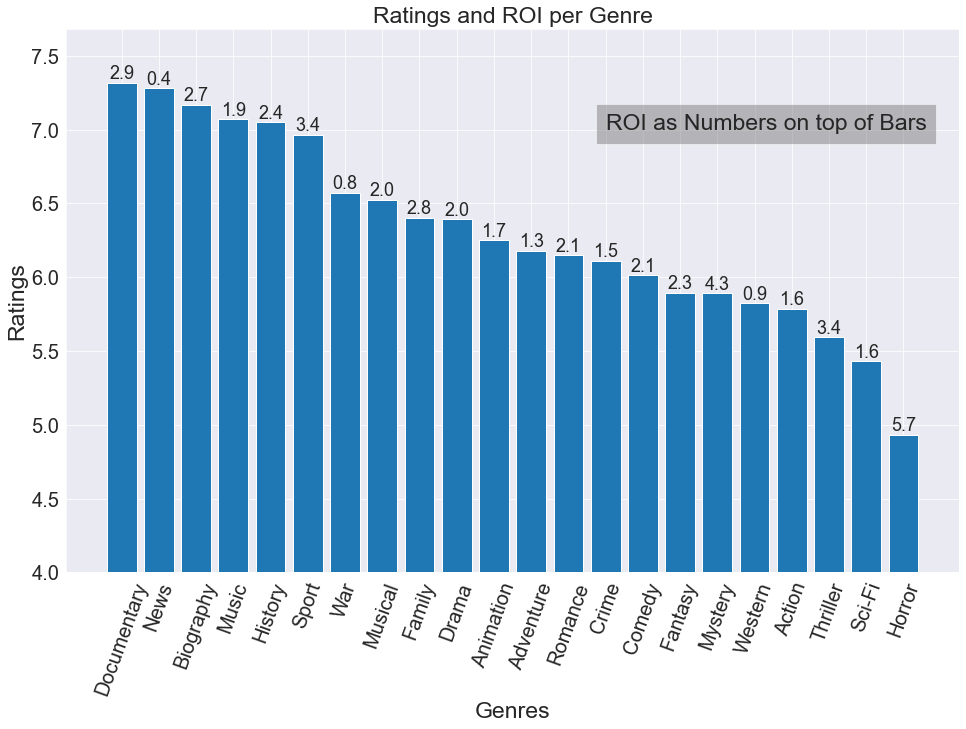

In [218]:
bar_chart_title = 'Ratings and ROI per Genre' 
bar_chart_count_label = 'Ratings'
bar_chart_series_label = 'Genres'



player_count_figure1, ax1 = plt.subplots(figsize=(16, 10))

ax1.bar(x = sorted_genres , height =  sorted_ratings) 


ax1.set_title(bar_chart_title, fontsize = 23) 
ax1.set_xlabel(bar_chart_series_label, fontsize=23) 
ax1.set_ylabel(bar_chart_count_label, fontsize = 23)
ax1.set_ylim(ymin=4)


plt.xticks(rotation=70,fontsize = 20);
plt.yticks(fontsize = 20);

ax1.text(13,7, "ROI as Numbers on top of Bars", fontsize = 23, bbox = {'facecolor': 'grey', 'alpha': 0.5, 'pad': 10})

rects = ax1.patches

labels = ROIS_list_in_order_of_bar_chart

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax1.text(
        rect.get_x() + rect.get_width() / 2, height, label, ha="center", va="bottom", fontsize=18 )


plt.show()